# Loading the Data

In [ ]:
!pip install gdown
import gdown

In [ ]:
# Download the file using gdown
file_id = '1eJaaqWQeIrTATGw8r1DVMHQifPvWzV-D'
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", 'data.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1eJaaqWQeIrTATGw8r1DVMHQifPvWzV-D
From (redirected): https://drive.google.com/uc?export=download&id=1eJaaqWQeIrTATGw8r1DVMHQifPvWzV-D&confirm=t&uuid=89af2f17-20e4-4e0f-be81-f815a4afca12
To: /content/data.csv
100%|██████████| 554M/554M [00:09<00:00, 59.2MB/s]


'data.csv'

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
verses_df = pd.read_csv('data.csv')  # Skips lines with too many fields
# df.head()  # Show the first few rows of the DataFrame


# Cleaning the data

In [ ]:
columns_to_check = ['البيت']

# Drop rows with nulls in the 'البيت' column
cleaned_verses_df = verses_df.dropna(subset=columns_to_check)

In [ ]:
def clean_half_verse(verse):
    # Retain Arabic letters, spaces, and harakat (diacritics), and remove everything else including '|'
    return re.sub(r'[^\u0621-\u064A\sًٌٍَُِّْ]', '', verse)  # Arabic letters and harakat

# **############# CORRUPTED VERSES  #############**

In [ ]:
cleaned_verses_df.head()

العصر             الشاعر          الديوان القافية   البحر  \
0  قبل الإسلام  عمرو بنِ قُمَيئَة  الديوان الرئيسي       د  الطويل   
1  قبل الإسلام  عمرو بنِ قُمَيئَة  الديوان الرئيسي       د  الطويل   
2  قبل الإسلام  عمرو بنِ قُمَيئَة  الديوان الرئيسي       د  الطويل   
3  قبل الإسلام  عمرو بنِ قُمَيئَة  الديوان الرئيسي       د  الطويل   
4  قبل الإسلام  عمرو بنِ قُمَيئَة  الديوان الرئيسي       د  الطويل   

                            الشطر الايسر  \
0   وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا   
1  وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى   
2  وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا   
3    تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا   
4   وَأَفرَعَ في لَومي مِراراً وَأَصعَدا   

                             الشطر الايمن  \
0   خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا   
1     فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ   
2  وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً   
3      لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ   
4    وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ   

                                               البيت  
0  خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا    وَأَن...  
1  فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ    وَلا سُ...  
2  وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً    وَتَ...  
3  لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ    تُؤامِرُ...  
4  وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ    وَأَفر...

In [ ]:
filtered_df = cleaned_verses_df[cleaned_verses_df['البحر'] == 'الطويل']

In [ ]:
len(filtered_df)

405378

In [ ]:
!pip install Farasa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 55.6 MB/s eta 0:00:00


In [ ]:
from farasa import segmentation as s

s.segmentLine(filtered_df['الشطر الايمن'][274])
# filtered_df['الشطر الايمن'][:100]

['ردد+ت', 'علي+ه', 'نفس+ه', 'ف+كأنما']

In [ ]:
import pandas as pd

# Randomly sample 1000 rows from the 'الشطر الايمن' column in filtered_df
random_sample = filtered_df['الشطر الايمن'].sample(n=1000, random_state=42)  # Set random_state for reproducibility

# Convert the sampled rows to a list of strings
sampled_list = random_sample.astype(str).tolist()

# Display the first few items in the list
print(sampled_list[:5])


['قد استظهرت شعري ثريا فكلما', 'لعمري لهذا البدر مِ البدر أضوأُ', 'فما هو الا البدر في حالك الدجى', 'هوىً لا يُديلُ القربُ منه ولا النَّوى', 'متى نبلغ الغايات سعياً بأرجل']


In [ ]:
segmented_list = [s.segmentLine(verse) for verse in sampled_list]

In [ ]:
import re

# List of segmented words
# segmented_words = segmented_list[0]

# Regular expression pattern to match strings with '+' followed by one letter or one letter followed by '+'
pattern = r'\b\w\+|\+\w\b'

# Loop through the list and find the first matching string
corrupted_verse = []
for item in segmented_list:
  modified_item = item[:]
  for i,word in enumerate(item):
      if re.search(pattern, word):
          first_match = word
          parts = word.split('+')
          new_word = max(parts, key=len)
          modified_item[i] = new_word
          corrupted_verse.append((modified_item, item))
      # else:
          break

# Display the first matching string
# print("First match:", first_match)


In [ ]:
segmented_list[40:50]

[['أيبخل', 'فرد', 'ال+حسن', 'فرد', 'صفا'],
 ['ينزل', 'من', 'ال+جار', 'في', 'مشمخر+ة'],
 ['هطل+نا', 'وادي', 'ال+منحوان', 'ليل'],
 ['اذ', 'قل', 'قد', 'ولى', 'ال+صبا', 'ارتد', 'ل+ال+صبا'],
 ['طلب', 'لدي+كم', 'عتاب', 'زياد+ة'],
 ['عماد', 'ال+هدةى', 'ال+ملك', 'ال+عزيز', 'الذي', 'ب'],
 ['إذا', 'استشفعوا', 'في', 'أيم', 'شفع', 'هم'],
 ['أن', 'أرد', 'ال+ماء', 'الذي', 'شرب', 'ب+ه'],
 ['خذ', 'ال+شاء', 'إبل', 'ال+سمان', 'إن'],
 ['ما', 'لي', 'انتقال', 'بعد', 'مغنى', 'غني']]

In [ ]:
output = []
input = []
for i in corrupted_verse:
  a = ' '.join(word.replace('+', '') for word in i[0])
  b = ' '.join(word.replace('+', '') for word in i[1])
  output.append(b)
  input.append(a)


# print(good)



In [ ]:
data_tuples = list(zip(output, input))

# List to hold dictionaries of each (output, input) pair
json_list = []

# Loop through each tuple and create a dictionary, then append to list
for output, input_text in data_tuples:
    json_list.append({
        "input": input_text,
        "output": output

    })

In [ ]:
len(json_list)

939

In [ ]:
import json
with open('data.json', 'w', encoding='utf-8') as file:
    json.dump(json_list, file, ensure_ascii=False, indent=2)


In [ ]:
# Original list of words
words = ['قد', 'استظهر+ت', 'شعري', 'ثري+ا', 'ف+كلما']

# Find and modify the word that contains the '+'
for i, word in enumerate(words):
    if '+' in word:
        # Remove the part after or before the '+' as needed (example: remove '+ت')
        modified_word = re.sub(r'\+.', '', word)  # Adjust the regex as needed
        words[i] = modified_word  # Update the list with the modified word
        break  # Exit after modifying the first match

# Join all words into a single string with spaces
result_string = ' '.join(words)

# Display the result
print("Result:", result_string)


Result: قد استظهر شعري ثري+ا ف+كلما


In [ ]:
word = 'استظهر+ت'
parts = word.split('+')
max(parts, key=len)

'استظهر'

In [ ]:
corrupted_verse

[['قد', 'استظهر', 'شعري', 'ثري+ا', 'ف+كلما'],
 ['عمري', 'ل+هذا', 'ال+بدر', 'م', 'ال+بدر', 'أضوأ'],
 ['ما', 'هو', 'الا', 'ال+بدر', 'في', 'حال+ك', 'ال+دجى'],
 ['هوى', 'لا', 'يديل', 'ال+قرب', 'من', 'و+لا', 'ال+نوى'],
 ['متى', 'نبلغ', 'ال+غاي+ات', 'سعي', 'ب+أرجل']]

In [ ]:
segmented_list[0:5]

[['قد', 'استظهر+ت', 'شعري', 'ثري+ا', 'ف+كلما'],
 ['ل+عمري', 'ل+هذا', 'ال+بدر', 'م', 'ال+بدر', 'أضوأ'],
 ['ف+ما', 'هو', 'الا', 'ال+بدر', 'في', 'حال+ك', 'ال+دجى'],
 ['هوى', 'لا', 'يديل', 'ال+قرب', 'من+ه', 'و+لا', 'ال+نوى'],
 ['متى', 'نبلغ', 'ال+غاي+ات', 'سعي+ا', 'ب+أرجل']]

# **############# CORRUPTED VERSES  #############**

In [ ]:
import re

In [ ]:
filtered_row = cleaned_verses_df[
    (cleaned_verses_df['البحر'] == 'الرجز') &
    (cleaned_verses_df['القافية'] == 'ب') &
    (cleaned_verses_df['العصر'] == 'قبل الإسلام') &
    (cleaned_verses_df['الديوان'] == 'الديوان الرئيسي') &
    (cleaned_verses_df['الشاعر'] == 'أبو أجَأ بن كعب التغلبي')
]

# Show the filtered row
filtered_row

العصر                   الشاعر          الديوان القافية  البحر  \
1021519  قبل الإسلام  أبو أجَأ بن كعب التغلبي  الديوان الرئيسي       ب  الرجز   
1021520  قبل الإسلام  أبو أجَأ بن كعب التغلبي  الديوان الرئيسي       ب  الرجز   
1021521  قبل الإسلام  أبو أجَأ بن كعب التغلبي  الديوان الرئيسي       ب  الرجز   
1021522  قبل الإسلام  أبو أجَأ بن كعب التغلبي  الديوان الرئيسي       ب  الرجز   
1021523  قبل الإسلام  أبو أجَأ بن كعب التغلبي  الديوان الرئيسي       ب  الرجز   

        الشطر الايسر                            الشطر الايمن  \
1021519          NaN  قَد عَمَّتِ النَّعمَاءُ سَعداً وَعِكَب   
1021520          NaN       وَالخالِدينَ قَد قذفنا بِالنَّشَب   
1021521          NaN     وَقَد وَصَلنا ثَعلَبَيهم بِالنَّسَب   
1021522          NaN     أَخوالُنا مِن خَيرِ أَخوالِ العَرَب   
1021523          NaN     قَد كانَ ذا مِنكُم قَديماً لا كَذِب   

                                              البيت  
1021519  قَد عَمَّتِ النَّعمَاءُ سَعداً وَعِكَب      
1021520       وَالخالِدينَ قَد قذفنا بِالنَّشَب      
1021521     وَقَد وَصَلنا ثَعلَبَيهم بِالنَّسَب      
1021522     أَخوالُنا مِن خَيرِ أَخوالِ العَرَب      
1021523     قَد كانَ ذا مِنكُم قَديماً لا كَذِب

In [ ]:
# Strip whitespace from the 'البيت' column
cleaned_verses_df['البيت'] = cleaned_verses_df['البيت'].str.strip()

# Drop rows where البيت is NaN, an empty string, or just whitespace
cleaned_verses_df = cleaned_verses_df[cleaned_verses_df['البيت'].notnull() & (cleaned_verses_df['البيت'] != '')]

In [ ]:
allowed_values = ['الطويل', 'المنسرح', 'المتقارب', 'الخفيف', 'الكامل', 'السريع',
                  'الوافر', 'الرجز', 'البسيط', 'الرمل', 'المجتث', 'المديد', 'الهزج',
                  'المتدارك', 'المقتضب', 'المضارع']

# Filter the DataFrame to only include rows where 'البحر' is in the allowed values
filtered_cleaned_verses_df = cleaned_verses_df[cleaned_verses_df['البحر'].isin(allowed_values)]

In [ ]:
filtered_cleaned_verses_df = filtered_cleaned_verses_df.drop(columns=['الديوان'])

In [ ]:
filtered_cleaned_verses_df = filtered_cleaned_verses_df[filtered_cleaned_verses_df['الشطر الايسر'].notnull()]

In [ ]:
# Print the content of the problematic row in 'الشطر الايسر'
garbled_line = filtered_cleaned_verses_df.loc[1198731, 'البيت']
print(f"Garbled line: {garbled_line}")

Garbled line: ط§ظ„ط´ط·ط± ط§ظ„ط£ظˆظ„    ط§ظ„ط´ط·ط± ط§ظ„ط«ط§ظ†ظٹ


In [ ]:
try:
    fixed_line = garbled_line.encode('windows-1256').decode('utf-8')
    print(f"Fixed line: {fixed_line}")
except UnicodeEncodeError as e:
    print(f"Encoding issue: {e}")

Fixed line: الشطر الأول    الشطر الثاني


In [ ]:
filtered_cleaned_verses_df = filtered_cleaned_verses_df.drop(1198731)

In [ ]:
# Improved function to fix encoding issues only when needed
def fix_encoding(text):
    try:
        # Check if text is not null and is a string
        if pd.notnull(text) and isinstance(text, str):
            # Try encoding and decoding only if it's misencoded
            return text.encode('latin1').decode('windows-1256')
        else:
            return text
    except (UnicodeEncodeError, UnicodeDecodeError):
        # If encoding/decoding fails, return the original text
        return text

# Apply the encoding fix to relevant columns
filtered_cleaned_verses_df['الشطر الايسر'] = filtered_cleaned_verses_df['الشطر الايسر'].apply(fix_encoding)
filtered_cleaned_verses_df['الشطر الايمن'] = filtered_cleaned_verses_df['الشطر الايمن'].apply(fix_encoding)
filtered_cleaned_verses_df['البيت'] = filtered_cleaned_verses_df['البيت'].apply(fix_encoding)


In [ ]:
# Now search for rows that contain "الشطر الأول" or "الشطر الثاني" in the fixed columns
fucked_up_rows = filtered_cleaned_verses_df[
    (filtered_cleaned_verses_df['الشطر الايسر'] == 'الشطر الأول') |
    (filtered_cleaned_verses_df['الشطر الايسر'] == 'الشطر الثاني') |
    (filtered_cleaned_verses_df['الشطر الايمن'] == 'الشطر الأول') |
    (filtered_cleaned_verses_df['الشطر الايمن'] == 'الشطر الثاني') |
    (filtered_cleaned_verses_df['البيت'] == 'الشطر الأول') |
    (filtered_cleaned_verses_df['البيت'] == 'الشطر الثاني')
]

# Display rows with placeholder patterns
print(f"Found {len(fucked_up_rows)} rows with placeholders:")
fucked_up_rows


Found 2 rows with placeholders:


العصر     الشاعر القافية   البحر  الشطر الايسر  \
1773068  بين الدولتين  معجز أحمد     NaN  الطويل  الشطر الثاني   
1773069  بين الدولتين  معجز أحمد     NaN  الطويل  الشطر الثاني   

            الشطر الايمن                            البيت  
1773068  الشطر ؤءؤئالأول  الشطر ؤءؤئالأول    الشطر الثاني  
1773069      الشطر الأول      الشطر الأول    الشطر الثاني

In [ ]:
filtered_cleaned_verses_df = filtered_cleaned_verses_df.drop([1773068, 1773069])

In [ ]:
import string

# Define a function to remove punctuation from a given text
def remove_punctuation(text):
    if pd.notnull(text) and isinstance(text, str):
        # Replace Arabic and English punctuation
        punctuation = string.punctuation + "،؛.؟×"
        return text.translate(str.maketrans('', '', punctuation))
    return text

# Apply the function to the relevant columns to remove punctuation
filtered_cleaned_verses_df['الشطر الايمن'] = filtered_cleaned_verses_df['الشطر الايمن'].apply(remove_punctuation)
filtered_cleaned_verses_df['الشطر الايسر'] = filtered_cleaned_verses_df['الشطر الايسر'].apply(remove_punctuation)
filtered_cleaned_verses_df['البيت'] = filtered_cleaned_verses_df['البيت'].apply(remove_punctuation)

# Verify the changes
filtered_cleaned_verses_df.head(10)

العصر             الشاعر القافية   البحر  \
0  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
1  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
2  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
3  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
4  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
5  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
6  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
7  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
8  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   
9  قبل الإسلام  عمرو بنِ قُمَيئَة       د  الطويل   

                                 الشطر الايسر  \
0        وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا   
1       وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى   
2       وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا   
3         تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا   
4        وَأَفرَعَ في لَومي مِراراً وَأَصعَدا   
5          سِوى قَولِ باغٍ كادَني فَتَجَهَّدا   
6      إِذا ما المُنادي في المَقامَةِ نَدَّدا   
7        وَلا مُؤيِسٌ مِنها إِذا هُوَ أَوقَدا   
8  مِنَ الريحِ لَم تَترُك لِذي المالِ مِرفَدا   
9    إِذا ضَنَّ ذو القُربى عَلَيهِم وَأَخمَدا   

                              الشطر الايمن  \
0    خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا   
1      فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ   
2   وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً   
3       لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ   
4     وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ   
5    عَلى غَيرِ ذَنبٍ أَن أَكونَ جَنَيتُهُ   
6  لَعَمري لَنِعمَ المَرءُ تَدعو بِحَبلِهِ   
7     عَظيمُ رَمادِ القِدرِ لا مُتَعَبِّسٌ   
8  وَإِن صَرَّحَت كَحلٌ وَهَبَّت عَرِيَّةٌ   
9   صَبَرتُ عَلى وَطءِ المَوالي وَحَطمِهِم   

                                               البيت  
0  خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا    وَأَن...  
1  فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ    وَلا سُ...  
2  وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً    وَتَ...  
3  لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ    تُؤامِرُ...  
4  وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ    وَأَفر...  
5  عَلى غَيرِ ذَنبٍ أَن أَكونَ جَنَيتُهُ    سِوى ...  
6  لَعَمري لَنِعمَ المَرءُ تَدعو بِحَبلِهِ    إِذ...  
7  عَظيمُ رَمادِ القِدرِ لا مُتَعَبِّسٌ    وَلا م...  
8  وَإِن صَرَّحَت كَحلٌ وَهَبَّت عَرِيَّةٌ    مِن...  
9  صَبَرتُ عَلى وَطءِ المَوالي وَحَطمِهِم    إِذا...

In [ ]:
### Add tow letters column
filtered_cleaned_verses_df['last_letter'] = filtered_cleaned_verses_df['البيت'].str.slice(-1)

In [ ]:
filtered_cleaned_verses_df['last_letter'].value_counts()

last_letter
ا    361652
ِ    304241
ُ    237525
ي    102803
ه     83858
ر     78787
م     57869
د     53041
ل     51045
ب     46080
ْ     42727
ن     40221
ى     35415
ق     19043
ء     17963
ع     17503
ح     12439
ت     11802
ف     11536
ك     10503
س     10011
ة      9569
َ      4997
ج      4410
ّ      3254
ض      2531
و      2428
ً      2407
ط      2027
ز      1617
ص      1457
ث      1301
ش      1282
ٍ      1184
خ       940
ٌ       580
غ       497
ظ       492
ذ       455
أ       255
         31
ئ        24
ؤ         7
آ         6
1         5
         4
إ         4
2         4
4         3
         2
0         2
3         2
5         2
7         2
»         2
‍         1
8         1
9         1
6         1
Name: count, dtype: int64

In [ ]:
filtered_cleaned_verses_df[filtered_cleaned_verses_df['last_letter'] == '×']

Empty DataFrame
Columns: [العصر, الشاعر, القافية, البحر, الشطر الايسر, الشطر الايمن, البيت, last_letter]
Index: []

In [ ]:
def remove_arabic_ellipsis(text):
    if pd.notnull(text) and isinstance(text, str):
        # Replace Arabic ellipsis (…)
        return text.replace('…', '')
    return text

# Apply the function to relevant columns
filtered_cleaned_verses_df['الشطر الايمن'] = filtered_cleaned_verses_df['الشطر الايمن'].apply(remove_arabic_ellipsis)
filtered_cleaned_verses_df['الشطر الايسر'] = filtered_cleaned_verses_df['الشطر الايسر'].apply(remove_arabic_ellipsis)
filtered_cleaned_verses_df['البيت'] = filtered_cleaned_verses_df['البيت'].apply(remove_arabic_ellipsis)

In [ ]:
# Define a function to remove extra white spaces but preserve spaces between words
def clean_extra_whitespace(text):
    if pd.notnull(text) and isinstance(text, str):
        # Remove leading/trailing white spaces and extra spaces between words
        return ' '.join(text.split())
    return text

# Apply this function to relevant columns
filtered_cleaned_verses_df['الشطر الايمن'] = filtered_cleaned_verses_df['الشطر الايمن'].apply(clean_extra_whitespace)
filtered_cleaned_verses_df['الشطر الايسر'] = filtered_cleaned_verses_df['الشطر الايسر'].apply(clean_extra_whitespace)
filtered_cleaned_verses_df['البيت'] = filtered_cleaned_verses_df['البيت'].apply(clean_extra_whitespace)




In [ ]:
invalid_left_shatr_condition = filtered_cleaned_verses_df['الشطر الايسر'].apply(lambda x: pd.isna(x) or str(x).strip() == '')

# Count the number of invalid rows
invalid_left_shatr_count = invalid_left_shatr_condition.sum()

print(f"Number of invalid rows (NaN, None, empty string, or whitespace): {invalid_left_shatr_count}")

# Filter out these invalid rows
cleaned_verses_df = filtered_cleaned_verses_df[~invalid_left_shatr_condition]

Number of invalid rows (NaN, None, empty string, or whitespace): 0


# Here we start merging the indivisual verses into single peom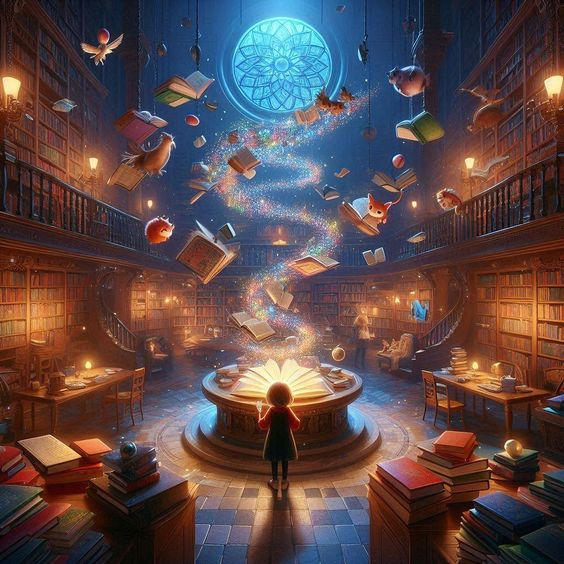







In [ ]:
cleaned_verses_df['الشطر الايمن'] = cleaned_verses_df['الشطر الايمن'].fillna('').astype(str).apply(clean_half_verse)
cleaned_verses_df['الشطر الايسر'] = cleaned_verses_df['الشطر الايسر'].fillna('').astype(str).apply(clean_half_verse)

cleaned_verses_df['البيت'] = cleaned_verses_df["الشطر الايمن"] + " | " + cleaned_verses_df['الشطر الايسر']

cleaned_verses_df['البيت'] = cleaned_verses_df['البيت'].fillna('').astype(str)

group_columns = ['الشاعر','العصر', 'القافية', 'البحر']
# Step 4: Group by the selected columns and concatenate the verses into a single string (representing the poem's body)
merged_poems = cleaned_verses_df.groupby(group_columns).agg({
    'البيت': lambda x: ' || '.join(x)  # Use ' || ' as the separator between full verses
}).reset_index()

merged_poems = merged_poems.rename(columns={'البيت': 'poem_body'})

In [ ]:
merged_poems.head()

الشاعر    العصر القافية    البحر  \
0                        الغزال البستي  الفاطمي       ب   الخفيف   
1                        الغزال البستي  الفاطمي       م   الكامل   
2                   لُطْف الله الهاشمي  الفاطمي       ل  المنسرح   
3         محمد بن عميرة الجشمي البيهقي  الفاطمي       م   الكامل   
4  آمنة بنت الوليد بن يحيى بن أبي حفصة  العباسي       ن   الطويل   

                                           poem_body  
0  أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...  
1  قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...  
2  قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...  
3  قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...  
4  أبا السمطِ إنْ كانت أحاديثكَ التي | أتتنا يقين...

In [ ]:
merged_poems.loc[19318, 'القافية'] = 'ن'

In [ ]:
merged_poems.loc[4141, 'القافية'] = 'ن'

In [ ]:
example = merged_poems[merged_poems['القافية'] == 'ء']

In [ ]:
example.head()

الشاعر            العصر القافية    البحر  \
7          أبزون العماني          العباسي       ء   الخفيف   
8          أبزون العماني          العباسي       ء   الكامل   
49    أبو اسحاق الألبيري  المغرب والأندلس       ء   الخفيف   
100    أبو الأسود الدؤلي           الأموي       ء   الوافر   
202  أبو الجوائز الواسطي          الفاطمي       ء  المنسرح   

                                             poem_body  
7    رقَّ خلق الزمان واعتدل الجوّ | اعتدالاً وخفَّ ...  
8    وأعزّةٌ عَزَّيتُ بعد فراقهم | باليأس قلبي أن ي...  
49   ما عَناءُ الكَبيرِ بِالحَسناءِ | وَهوَ مِثلُ ا...  
100  وَما طَلَبُ المَعيشَةِ بِالتَمَنّي | وَلَكِن أ...  
202  بدرٌ هواه مضلِّلٌ رائي | يدنو ولكنْ وِصالُه نا...

In [ ]:
meter_counts = merged_poems['البحر'].value_counts()
meter_counts

البحر
الطويل      10763
الكامل       9153
البسيط       7706
الوافر       6243
الخفيف       5211
السريع       3728
المتقارب     3416
الرمل        3261
الرجز        2844
المنسرح      1798
المجتث       1417
المديد        576
الهزج         564
المتدارك      190
المقتضب        54
المضارع        24
Name: count, dtype: int64

In [ ]:
poet_counts = merged_poems['الشاعر'].value_counts()
poet_counts

الشاعر
ابن الرومي                270
ابن نباتة المصري          247
ابن الوردي                232
ابن المُعتَز              222
أَبو العَلاء المَعَرِي    218
                         ... 
جواد قشاقش                  1
جهيرة الثعلبية              1
جنادة بن عامر               1
جميل الفزاري                1
يَعلى الأَحول الأَزدي       1
Name: count, Length: 3356, dtype: int64

In [ ]:
era_counts = merged_poems['العصر'].value_counts()
era_counts

العصر
الحديث             16209
العباسي            10299
المغرب والأندلس     4917
المملوكي            4874
الفاطمي             4733
العثماني            4434
الأموي              3282
الأيوبي             2947
المخضرمين           2040
قبل الإسلام         1940
بين الدولتين         916
الإسلامي             357
Name: count, dtype: int64

In [ ]:
merged_poems = merged_poems.drop(columns=['الشاعر'])


In [ ]:
len(merged_poems)

56948

In [ ]:
merged_poems.to_csv('cleaned_poems.csv', index=False)

# Alternatively, you can save it as a pickle file for faster load times
merged_poems.to_pickle('cleaned_poems.pkl')

# Custom rhyming

In [ ]:
import re
from collections import Counter

# Helper function to normalize Arabic letters and handle special rhyme cases
def normalize_arabic_with_rhyme_elongation(word):
    # Step 1: Normalize Alef variations
    word = re.sub(r'[أإآ]', 'ا', word)
    word = word.replace('ى', 'ا')

    # Step 2: Handle specific Harakat (diacritics) endings
    if word.endswith('َ'):  # Ends with Fatha
        word = word[:-1] + 'ا'  # Replace with Alef
    elif word.endswith('ِ'):  # Ends with Kasrah
        word = word[:-1] + 'ي'  # Replace with Yaa
    elif word.endswith('ُ'):  # Ends with Damma
        word = word[:-1] + 'و'  # Replace with Waw

    # Step 3: Return normalized word
    return word

# Function to extract the rhyme based on the last word of each full verse
def extract_rhyme_from_poem(poem_body):
    # Step 1: Split the poem into full verses
    full_verses = poem_body.split(' || ')

    # Step 2: Extract the last word of each verse
    last_words = [verse.strip().split()[-1] for verse in full_verses if verse.strip()]

    # Step 3: Normalize the last words for rhyme extraction
    last_words_normalized = [normalize_arabic_with_rhyme_elongation(word) for word in last_words]

    # Step 4: Use majority rule to extract the rhyme
    rhyme_fragments = []
    reversed_words = [word[::-1] for word in last_words_normalized]

    for i in range(min(len(word) for word in reversed_words)):
        current_letters = [word[i] for word in reversed_words]
        letter_count = Counter(current_letters)
        most_common_letter, count = letter_count.most_common(1)[0]

        if count > len(reversed_words) // 2:
            rhyme_fragments.append(most_common_letter)
        else:
            break

    rhyme = ''.join(rhyme_fragments[::-1])

    return rhyme

In [ ]:
merged_poems['rhyme'] = merged_poems['poem_body'].apply(extract_rhyme_from_poem)

# Check the resulting DataFrame
merged_poems[['poem_body', 'rhyme']].head()




poem_body   rhyme
0  أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...     يبا
1  قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...      ام
2  قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...      لي
3  قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...  العالم
4  أبا السمطِ إنْ كانت أحاديثكَ التي | أتتنا يقين...      نْ

In [ ]:
merged_poems.shape

(56948, 6)

In [ ]:
merged_poems.head()


الشاعر    العصر القافية    البحر  \
0                        الغزال البستي  الفاطمي       ب   الخفيف   
1                        الغزال البستي  الفاطمي       م   الكامل   
2                   لُطْف الله الهاشمي  الفاطمي       ل  المنسرح   
3         محمد بن عميرة الجشمي البيهقي  الفاطمي       م   الكامل   
4  آمنة بنت الوليد بن يحيى بن أبي حفصة  العباسي       ن   الطويل   

                                           poem_body   rhyme  
0  أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...     يبا  
1  قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...      ام  
2  قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...      لي  
3  قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...  العالم  
4  أبا السمطِ إنْ كانت أحاديثكَ التي | أتتنا يقين...      نْ

In [ ]:
len(merged_poems)

56948

In [ ]:
samples_with_empty_rhyme = merged_poems['rhyme'].apply(lambda x: str(x).strip() == '')

In [ ]:
merged_poems = merged_poems[~samples_with_empty_rhyme]

In [ ]:
rhyme_counts_data=merged_poems['rhyme'].value_counts()
rhyme_counts_data

rhyme
ر          1231
ب           845
م           811
د           785
ل           761
           ... 
لوجو          1
بَتْ          1
ْتو           1
اَليَّه       1
َّتِيَه       1
Name: count, Length: 6626, dtype: int64

In [ ]:
rhyme_counts_df = pd.DataFrame(rhyme_counts_data)

In [ ]:
merged_poems.shape

(49826, 5)

In [ ]:
merged_poems = merged_poems.drop(columns=['العصر','rhyme'])

In [ ]:
merged_poems.to_csv('MyData.csv', index=True)

In [ ]:
from google.colab import files
# Download the CSV file
files.download('MyData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **##############LAMA##################**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/My-PhD-docs/codes/Diwan/diwan-with-topics.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                  name  \
0             0             0           0  لقيط بن يعمر الإيادي   
1             1             1           1  زبان بن سيار الفزاري   
2             2             2           2            سنان المري   
3             3             3           3            محرز الضبي   
4             4             4           4     قبيصة بن النصراني   

                                                info  \
0  [<h4 class="main-color h6 mt-3"> لقيط بن يعمر ...   
1  [<h4 class="main-color h6 mt-3"> زبان بن سيار،...   
2  [<h4 class="main-color h6 mt-3"> سنان بن أبي ح...   
3  [<h4 class="main-color h6 mt-3"> محرز بن المكع...   
4  [<h4 class="main-color h6 mt-3"> قبيصة بن النص...   

                                               poems  age  ages  new_ages  \
0  [('\n سَلامٌ في الصَحيفَةِ مِن لَقيطٍ إِلى مَن...    1     4       4.0   
1  [('\n تَنَحَّ إِلَيكُم يا اِبنَ كوزٍ فَإِنَّنا...    1     7       7.0   
2  [('\n أَلا فَاِعجِل لِبُرجَةَ بِالصَبوحِ صَريح...    1     0       6.5   
3  [('\n أبلِغ عَديّاً حيثُ صار بها النوَى وليسَ ...    1     0       6.5   
4  [('\n لَم أَرَ خَيلاً مِثلَها يَومَ أَدرَكَت ب...    1     6       6.0   

   p_num                                         only_poems  \
0      3  ['\n سلام في الصحيفة من لقيط إلى من بالجزيرة م...   
1     24  ['\n تنح إليكم يا ابن كوز فإننا وإن ذدتنا راعو...   
2      8  ['\n ألا فاعجل لبرجة بالصبوح صريحا إنها بنت ال...   
3     14  ['\n أبلغ عديا حيث صار بها النوى وليس لدهر الط...   
4      5  ['\n لم أر خيلا مثلها يوم أدركت بني شمجى خلف ا...   

                                              topics  
0       [[(0.417, 4), (0.266, 2)], [(0.807, 3)], []]  
1  [[(0.306, 1), (0.206, 3), (0.165, 4)], [(0.333...  
2  [[(0.226, 0), (0.223, 1), (0.194, 3)], [(0.508...  
3  [[(0.709, 3)], [(0.654, 3)], [(0.602, 3)], [(0...  
4  [[(0.676, 3)], [(0.616, 3)], [(0.366, 3), (0.1...

In [ ]:
import ast
ast.literal_eval(df['only_poems'][0])[0]

'\n سلام في الصحيفة من لقيط إلى من بالجزيرة من إياد بأن الليث كسرى قد أتاكم فلا يشغلكم سوق النقاد أتاكم منهم ستون ألفا يزجون الكتائب كالجراد على حنق أتيناكم فهذا أوان هلاككم كهلاك عاد \n'

In [ ]:
aswad = list(df['only_poems'][df['name']== 'أبو الأسود الدؤلي'].apply(lambda x: ast.literal_eval(x)))

In [ ]:
example = 'أَبلِغ أَبا الجارودِ عَنّي رِسالَةً | يَروحُ بِها الماشي لِقاءَكَ أَو يَغدو || فَيُخبِرُنا ما بالُ صَرمِكَ بَعدَ ما | رَضيتَ وَما غَيَّرتَ مِن خُلُقٍ بَعدُ || أَإِن نِلتَ خَيراً سَرَّني أَن تَنالَهُ | تَنَكَّرتَ حَتّى قُلتُ ذو لِبدَةٍ وَردُ || فَعَيناكَ عَيناهُ وَصَوتُكَ صَوتُهُ | تَمَثَّلتَهُ لي غَيرَ أَنَكَ لا تَعدو || فَإِن كُنتَ قَد أَزمَعتَ بِالصَرمِ بَينَنا | فَقَد جَعَلَت أَشراطُ أَوَّلِه تَبدو || وَكُنتُ إِذا ما صاحِبٌ رَثَّ وَصلُهُ | وَأَعرَضَ عَنّي قُلتُ بِالمَطَرِ الفَقدُ || أَلَم تَرَ انّي وَالتَكرُّمُ شيمَتي | وَكُلُّ امرىءٍ جارٍ عَلى ما تَعَوَّدا || أُطَهِّر أَثوابي مِنَ الغَدرِ والخَنا | وَأَنحو إِلى ما كانَ خَيراً وَأَمجَدا || وَشاعِرِ سوءٍ يَهضِمُ القَولَ كُلَّهُ | إِذا قالَ أَقوى ما يَقولُ وَأَسنَدا || صَفحتُ لَهُ بَعدَ الأَناةِ فَرُعتُهُ | بِحَرباءَ لَم يعلم لَها كَيفَ أَرصَدا || وَإِنّي لَذو حِلمٍ كَثيرٍ وَإِنَني | كَثيراً لأُشفي داءَ مَن كانَ أَصيَدا || أَعودُ عَلى المولى إِذا زَلَّ حِلمُهُ | بِحِلمي وَكانَ العَودُ أَبقى وَأَحمَدا || فَكُنتُ إِذا المَولى بِداليَ غِشُّهُ | تَجاوَزتُ عَنهُ واستَدَمتُ بِهِ غَدا || لِتُحكِمَه الأَيامُ أَو لِتَردَّهُ | عَليَّ وَلَم أَبسِط لِساناً وَلا يَدا || أَبي القَلبُ إِلّا أُمَّ عَوفٍ وَحُبَّها | عَجوزاً وَمَن يَحبِب عَجوزاً يُفَنَّدِ || كَسَحقِ اليَماني قَد تَقادَمَ عَهدُهُ | وَجِدَّتُهُ ما شِئتَ في العَينِ واليَدِ || أَفاطِمَ مَهلاً بَعضَ لَومي وَأَحقادي | وَلا تَعجَلي إِنَّ الصَحابَةَ كالزادِ || يُخَفَّفُ مِنهُ كُلَّما حُلَّ مَنزِلٌ | وَلا يُنتَهى عَن بَعضِهِ دونَ إِنفادِ || أَفاطِمَ وَالمُستَعجِلُ الَبينَ كالَّذي | يُنادي بِإِدلاجٍ وَصاحِبُهُ غادى || فَإِنَّكِ إِن لا تَعجَلي اليَومَ تَظفَري | بِحَظِّكِ مِنهُ في جَمالٍ وَإِسدادِ || وَإِنَّ الأُلى يَلحونَكِ النُصحَ مِنهُمُ | فَما مِنهُم داعٍ لِرُشدٍ وَلا هادِ || وَإِنَّكِ إِن لا تَترُكي ما يُريبُني | أُصِبكِ بِشَرٍّ ناجِزٍ غَيرَ أَحقادِ || لَقَد جَدَّ في سَلمى الشَكاةُ وَلَلَّذي | يَقولونَ لَو يَبدو لَكَ الرُشدُ أَرشَدُ || يَقولونَ لا تمذَل بِعِرضِكَ واِصطَنِع | مَعادَك أَنَّ اليَومَ يَتبَعُهُ غَدُ || وَإِيّاكَ والقَومَ الغِضابَ فَإِنَّهُم | بِكُلِّ طَريقٍ حَولَهُم يُتَرَصَّدُ || تُلامُ وَتُلحى كُلَّ يَومٍ وَلا تُرى | عَلى اللَومِ إِلّا حَولَها تَتَرَدَّدُ || أَقادَتكَها العَينُ اللَجوجُ وَقَد تُري | لَكَ العَينُ ما لا تَستَطيعُ لَكَ اليَدُ || أَلَم تَرَ أَنّي أَجعَلُ الوَأيَ ذِمَّةً | أَخو الغَدرِ عِندي رَوغَةُ المَرءِ بِالوَعدِ || وَما رَجُلٌ لا يَقتَفي بِكَلامِهِ | بِموفٍ بِميثاقٍ عَليهِ وَلا عَهدِ || إِذا المَرءُ ذو القُربى وَذو الذَنبِ أَجحَفَت | بِهِ ضَرَّةٌ حَلَّت مُصيبَتُهُ حِقدي || لَعَمرُكَ ما نَصرٌ فَلا تَحسِبَنَّهُ | مِنَ المُسلِمينَ بِالقَويِّ وَلا الجَلدِ || خَرَجتَ مَع العَوراءِ تَلتَمِسُ الهُدى | وَكانَ الهُدى فيما تَرَكتَ عَلى عَمدِ || وَقَد كانَ في الفُرقانِ لَو كُنتَ باغِياً | لِنَفسِكَ مِنهُ ما يَدُلُّ عَلى الرُشدِ || لا تُشعِرَنَّ النَفسَ يَأساً فَإِنَّما | يَعيشُ بِجَدٍّ حازِمٌ وَبَليدُ || وَلا تَطمَعَن في مالِ جارٍ لِقُربِهِ | فَكُلُّ قَريبٍ لا يُنالُ بَعيدُ || وَفَوِّض إِلى اللَهِ الأُمورَ فَإِنَّما | تَروحُ بِأَرزاقٍ عَلَيكِ جُدودُ || أَبى اللَهُ الّا أَنَّ لِلأَزدِ فَضلَها | وَأَنَّهُمُ أَوتادُ كُلِّ بِلادِ || أَجاروا زياداً حينَ أَسلَمَ نَفسَهُ | إِلَيهِم وَكانَ الرأيُ رأيَ زيادِ || فَأَصبَحَ في الحَدّانِ وَالأُزدُ دونَهُ | بسُمرٍ كَأَشطانِ الجرورِ حِدادِ || لَهُ مِنبَرٌ يَرقاهُ في كُلِّ جُمعَةٍ | وَآلَة مُلكٍ شُرطَةٍ وَحشادِ'

In [ ]:
for i in example.split(' || '):
  print(i)

أَبلِغ أَبا الجارودِ عَنّي رِسالَةً | يَروحُ بِها الماشي لِقاءَكَ أَو يَغدو
فَيُخبِرُنا ما بالُ صَرمِكَ بَعدَ ما | رَضيتَ وَما غَيَّرتَ مِن خُلُقٍ بَعدُ
أَإِن نِلتَ خَيراً سَرَّني أَن تَنالَهُ | تَنَكَّرتَ حَتّى قُلتُ ذو لِبدَةٍ وَردُ
فَعَيناكَ عَيناهُ وَصَوتُكَ صَوتُهُ | تَمَثَّلتَهُ لي غَيرَ أَنَكَ لا تَعدو
فَإِن كُنتَ قَد أَزمَعتَ بِالصَرمِ بَينَنا | فَقَد جَعَلَت أَشراطُ أَوَّلِه تَبدو
وَكُنتُ إِذا ما صاحِبٌ رَثَّ وَصلُهُ | وَأَعرَضَ عَنّي قُلتُ بِالمَطَرِ الفَقدُ
أَلَم تَرَ انّي وَالتَكرُّمُ شيمَتي | وَكُلُّ امرىءٍ جارٍ عَلى ما تَعَوَّدا
أُطَهِّر أَثوابي مِنَ الغَدرِ والخَنا | وَأَنحو إِلى ما كانَ خَيراً وَأَمجَدا
وَشاعِرِ سوءٍ يَهضِمُ القَولَ كُلَّهُ | إِذا قالَ أَقوى ما يَقولُ وَأَسنَدا
صَفحتُ لَهُ بَعدَ الأَناةِ فَرُعتُهُ | بِحَرباءَ لَم يعلم لَها كَيفَ أَرصَدا
وَإِنّي لَذو حِلمٍ كَثيرٍ وَإِنَني | كَثيراً لأُشفي داءَ مَن كانَ أَصيَدا
أَعودُ عَلى المولى إِذا زَلَّ حِلمُهُ | بِحِلمي وَكانَ العَودُ أَبقى وَأَحمَدا
فَكُنتُ إِذا المَولى بِداليَ غِشُّهُ | تَجاوَزتُ عَنهُ واستَدَمتُ ب

In [ ]:
import pandas as pd

# Assuming merged_poems is your DataFrame
# Filter rows where 'rhyme' column contains only whitespace (including spaces, tabs, etc.)
filtered_poems = merged_poems[merged_poems['rhyme'].str.strip() == '']

# Extract the values of 'poem_body' for these rows
poem_bodies = filtered_poems['poem_body'].tolist()

# Display all examples
for poem_body in poem_bodies[3:6]:
    print(poem_body)
https://drive.google.com/file/d/1eJaaqWQeIrTATGw8r1DVMHQifPvWzV-D/view?usp=drive_link

تَولَّى المَوْصِلِيّ فقد تَوَلَّتْ | بَشَاشاتُ المَزَاهِر والقيَانِ || وأيُّ مَلاَحَةٍ بقيَتْ فَتَبْقى | حياةُ المَوْصِلي على الزَّمانِ || سَتْبكيهِ المَزَاهِرُ والمَلاَهي | وُيُسْعدُهُنَّ عاتقةُ الدَّنان || وَتبكِيهِ الغَوّيةُ إذ تَوَلَّى | ولا تبكيهِ تاليةُ القُران
أَبلِغ أَبا الجارودِ عَنّي رِسالَةً | يَروحُ بِها الماشي لِقاءَكَ أَو يَغدو || فَيُخبِرُنا ما بالُ صَرمِكَ بَعدَ ما | رَضيتَ وَما غَيَّرتَ مِن خُلُقٍ بَعدُ || أَإِن نِلتَ خَيراً سَرَّني أَن تَنالَهُ | تَنَكَّرتَ حَتّى قُلتُ ذو لِبدَةٍ وَردُ || فَعَيناكَ عَيناهُ وَصَوتُكَ صَوتُهُ | تَمَثَّلتَهُ لي غَيرَ أَنَكَ لا تَعدو || فَإِن كُنتَ قَد أَزمَعتَ بِالصَرمِ بَينَنا | فَقَد جَعَلَت أَشراطُ أَوَّلِه تَبدو || وَكُنتُ إِذا ما صاحِبٌ رَثَّ وَصلُهُ | وَأَعرَضَ عَنّي قُلتُ بِالمَطَرِ الفَقدُ || أَلَم تَرَ انّي وَالتَكرُّمُ شيمَتي | وَكُلُّ امرىءٍ جارٍ عَلى ما تَعَوَّدا || أُطَهِّر أَثوابي مِنَ الغَدرِ والخَنا | وَأَنحو إِلى ما كانَ خَيراً وَأَمجَدا || وَشاعِرِ سوءٍ يَهضِمُ القَولَ كُلَّهُ | إِذا قالَ أَقوى ما يَقولُ وَأَسنَدا || صَ

In [ ]:
# https://drive.google.com/file/d/1x5L_npmc_O8IK7FIkxe0_lrFHOcsd3uk/view?usp=drive_link
# Download the file using gdown
file_id = '1x5L_npmc_O8IK7FIkxe0_lrFHOcsd3uk'
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", 'topics.csv', quiet=False)


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?export=download&id=1x5L_npmc_O8IK7FIkxe0_lrFHOcsd3uk

but Gdown can't. Please check connections and permissions.

In [ ]:
import pandas as pd
import ast  # To safely evaluate the list of tuples


# Define the Google Drive file ID
file_id = '1x5L_npmc_O8IK7FIkxe0_lrFHOcsd3uk'

# Define the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'file_with_tuples.txt'
gdown.download(download_url, output, quiet=False)

# Read the file (assumes it's a text file with the format you shared)
with open(output, 'r') as file:
    # Read each line, and convert the string representation of tuples to actual tuples
    topics = [ast.literal_eval(line.strip()) for line in file]

# Create a DataFrame for this list of lists
# tuples_df = pd.DataFrame(data, columns=['tuple_list'])

# # Load your existing dataframe (merged_poems)
# # Assuming you already have merged_poems DataFrame
# # merged_poems = pd.read_csv('your_merged_poems_file.csv')

# # Merge the tuples_df into your existing DataFrame by adding a new column
# merged_poems['tuple_column'] = tuples_df['tuple_list']

# # Display the result
# print(merged_poems.head())



Downloading...
From: https://drive.google.com/uc?id=1x5L_npmc_O8IK7FIkxe0_lrFHOcsd3uk
To: /content/file_with_tuples.txt
100%|██████████| 1.30M/1.30M [00:00<00:00, 133MB/s]


In [ ]:
topics[:5]

[[(0.497, 4), (0.272, 0)],
 [(0.587, 1)],
 [(0.327, 2), (0.269, 4), (0.138, 3)],
 [(0.478, 3), (0.256, 1)],
 [(0.492, 0)]]